# Multiple Linear Regression

# Problem Statement 1:

Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.

In [154]:
# Importing libraries
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels

# EDA

In [155]:
ls

 Volume in drive C is program files
 Volume Serial Number is 5C10-FCA7

 Directory of C:\Users\Sayali Hatwar\OneDrive\Desktop\Assignment files\MLR assignment

13-01-2023  14:53    <DIR>          .
13-01-2023  14:53    <DIR>          ..
13-01-2023  12:49    <DIR>          .ipynb_checkpoints
04-12-2022  21:07             2,436 50_Startups.csv
13-01-2023  12:46           358,246 Assignment MLR - 50_Startups.ipynb
13-01-2023  14:53           828,209 Assignment MLR - Toyato.ipynb
04-12-2022  21:07               468 proble_statement(50_startups).txt
04-12-2022  21:07             1,752 Toyota Corolla.txt
05-12-2022  21:58           224,041 ToyotaCorolla.csv
               6 File(s)      1,415,152 bytes
               3 Dir(s)  125,510,205,440 bytes free


In [156]:
# Reading csv file with the help of pandas
startup = pd.read_csv('50_Startups.csv')
startup.head(10)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [157]:
startup.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [158]:
startup.shape

(50, 5)

In [159]:
startup.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [160]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


# Correlation analysis

In [161]:
startup.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


# Feature Engineering

In [162]:
# Dropping the 'States' names
Startup = pd.DataFrame(startup)
startup = Startup.drop(['State'],axis = 1)

In [163]:
startup.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


# Feature Ranaming

In [164]:
# Renaming some column names
startup = startup.rename(columns={'R&D Spend':'RD_Spend','Marketing Spend':'Marketing_Spend'},inplace=False)
startup.head(10)

,RD_Spend,Administration,Marketing_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


# Visualization

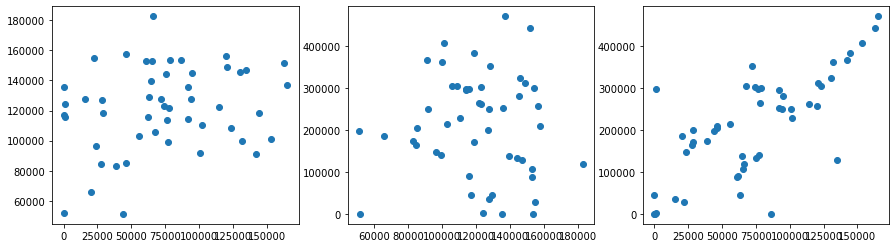

In [166]:
# Plotting scatter plot
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
plt.scatter(startup['RD_Spend'],startup['Administration'])
plt.subplot(1,3,2)
plt.scatter(startup['Administration'],startup['Marketing_Spend'])
plt.subplot(1,3,3)
plt.scatter(startup['RD_Spend'],startup['Marketing_Spend'])

<AxesSubplot:>

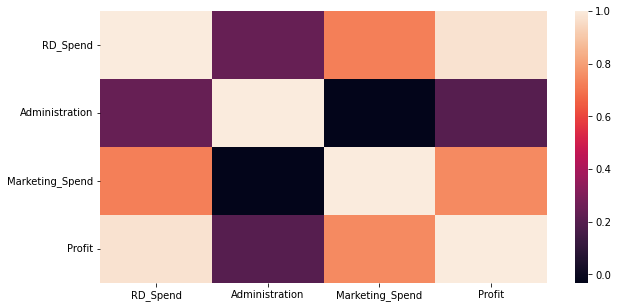

In [167]:
# Plotting heatmap with sns library
plt.figure(figsize=(10,5))
sns.heatmap(startup.corr())

# Model Building

In [168]:
first_model = smf.ols('Profit~RD_Spend+Administration+Marketing_Spend',data=startup).fit()
first_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Fri, 13 Jan 2023   Prob (F-statistic):           4.53e-30
Time:                        17:24:49   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RD_Spend            0.8057      0.045     17.846      0.000       0.715       0.897
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing_Spend     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model Validation

In [169]:
rsq_RD_Spend = smf.ols("RD_Spend~Administration+Marketing_Spend",data=startup).fit().rsquared  
vif_RD_Spend = 1/(1-rsq_RD_Spend)

rsq_Administration = smf.ols("Administration~RD_Spend+Marketing_Spend",data=startup).fit().rsquared  
vif_Administration = 1/(1-rsq_Administration) 

rsq_Marketing_Spend = smf.ols("Marketing_Spend~RD_Spend+Administration",data=startup).fit().rsquared  
vif_Marketing_Spend = 1/(1-rsq_Marketing_Spend) 

# Storing vif values in a data frame
startup1 = {'Variables':['RD_Spend','Administration','Marketing_Spend'],'VIF':[vif_RD_Spend,vif_Administration,vif_Marketing_Spend]}
Vif_frame = pd.DataFrame(startup1)  
Vif_frame

,Variables,VIF
0,RD_Spend,2.468903
1,Administration,1.175091
2,Marketing_Spend,2.326773


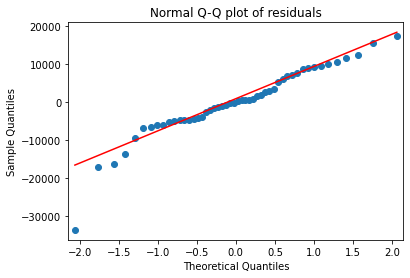

In [170]:
# Plotting Q-Q plot
sm.qqplot(first_model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [171]:
list(np.where(first_model.resid<-30000))

[array([49], dtype=int64)]

# Residual plot for Homoscedasticity

In [172]:
# Making function for std values
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

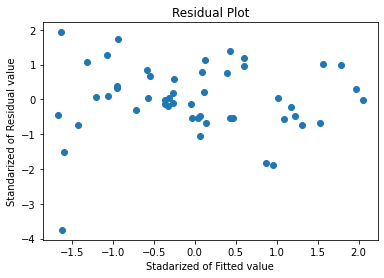

In [173]:
plt.scatter(get_standardized_values(first_model.fittedvalues),get_standardized_values(first_model.resid))
plt.title('Residual Plot')
plt.xlabel("Stadarized of Fitted value")
plt.ylabel("Standarized of Residual value")
plt.show()

# Residual Vs Regression

eval_env: 1


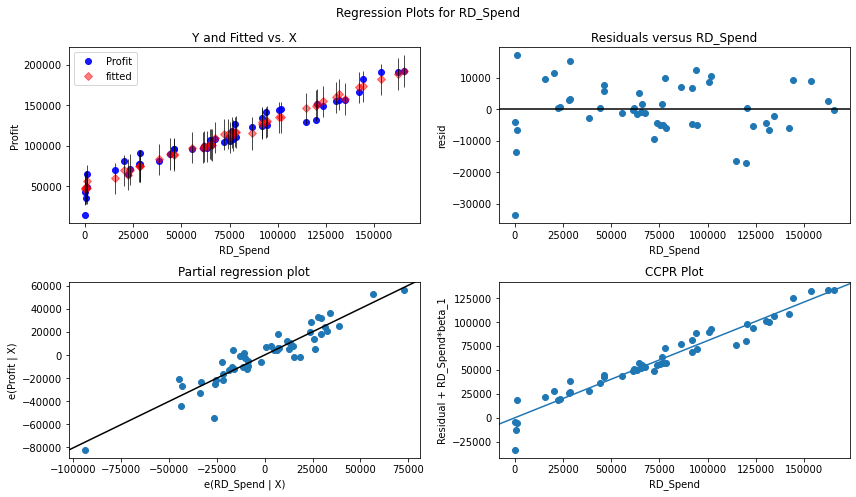

In [174]:
# Regression plot for RD_Spend
fig = plt.figure(figsize=(12,7))
sm.graphics.plot_regress_exog(first_model, "RD_Spend", fig=fig)
plt.show()


eval_env: 1


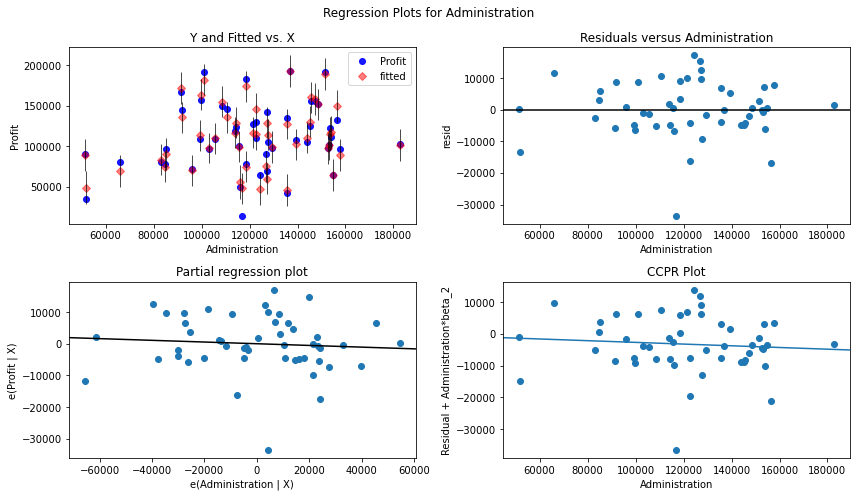

In [175]:
# Regression plot for Administration
fig = plt.figure(figsize=(12,7))
sm.graphics.plot_regress_exog(first_model, "Administration", fig=fig)
plt.show()


eval_env: 1


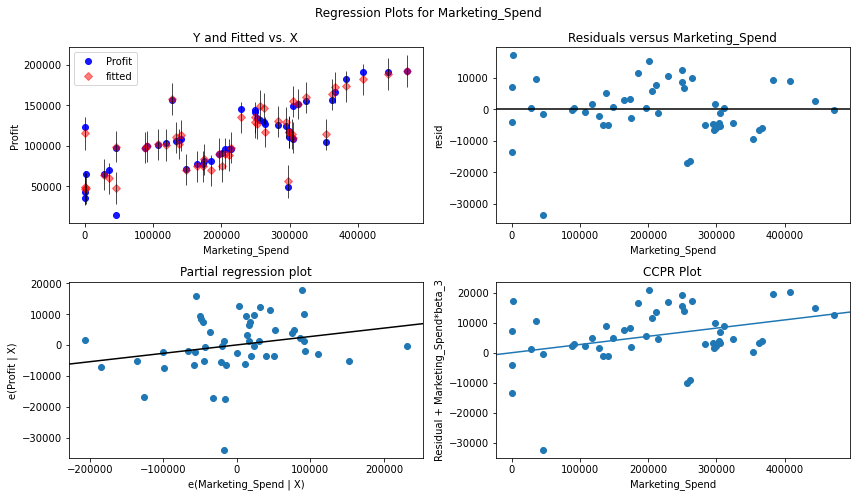

In [176]:
# Regression plot for Marketing_Spend
fig = plt.figure(figsize=(12,7))
sm.graphics.plot_regress_exog(first_model, "Marketing_Spend", fig=fig)
plt.show()


# Model deletion diagnostics

(checking outliers and influencers)

In [177]:
# Calculating cooks distance
model_influence=first_model.get_influence()
(c,_)=model_influence.cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

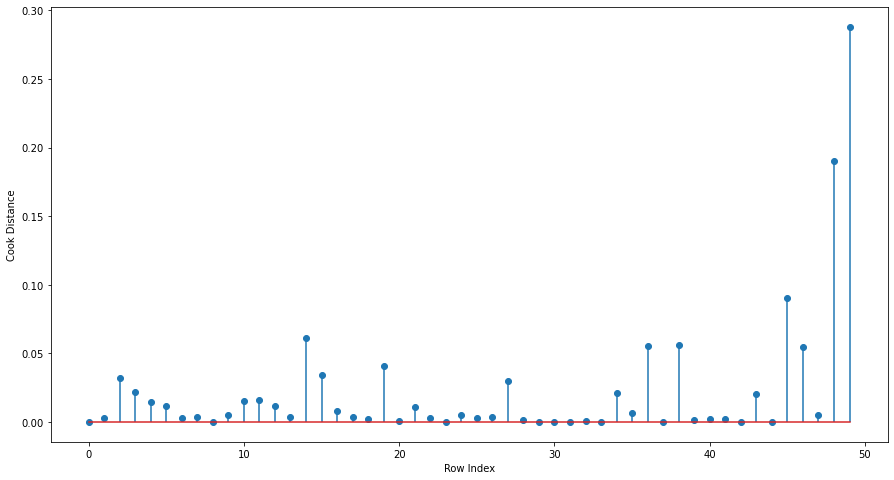

In [178]:
# Plotting stem graph to find outliers
fig=plt.figure(figsize=(15,8))
plt.stem(np.arange(len(startup)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cook Distance')
plt.show()

In [179]:
(np.argmax(c),np.max(c))

(49, 0.2880822927543263)

In [180]:
np.where(c>0.05)

(array([14, 36, 38, 45, 46, 48, 49], dtype=int64),)

The outliers are present on no. 14,36,38,45,46,48,49

Lets try to drop this no. for better model

# Improving model

(By dropping outlier pt.)

In [181]:
# Dropping outliers
startup1=startup.drop(startup.index[[14,36,38,45,46,49]],axis=0).reset_index(drop=True)
startup1.head()

,RD_Spend,Administration,Marketing_Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [182]:
startup1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RD_Spend         44 non-null     float64
 1   Administration   44 non-null     float64
 2   Marketing_Spend  44 non-null     float64
 3   Profit           44 non-null     float64
dtypes: float64(4)
memory usage: 1.5 KB


# Building final model

In [183]:
second_model = smf.ols('Profit~RD_Spend+Administration+Marketing_Spend',data=startup1).fit()
second_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     446.1
Date:                Fri, 13 Jan 2023   Prob (F-statistic):           9.12e-31
Time:                        17:24:53   Log-Likelihood:                -447.62
No. Observations:                  44   AIC:                             903.2
Df Residuals:                      40   BIC:                             910.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4.721e+04   5026.329      9.392      0.000     3.7e+04    5.74e+04
RD_Spend            0.8074      0.040     20.430      0.000       0.728       0.887
Administration     -0.0007      0.039     -0.019      0.985      -0.079       0.078
Marketing_Spend     0.0268      0.013      1.983      0.054      -0.001       0.054
==============================================================================
Omnibus:                        0.085   Durbin-Watson:                   1.688
Prob(Omnibus):                  0.959   Jarque-Bera (JB):                0.191
Skew:                          -0.095   Prob(JB):                        0.909
Kurtosis:                       2.740   Cond. No.                     1.43e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [184]:
# Table of R_squared of basic model and final model
data={"Models":['Basic Model','Final Model'],"R Squared":[first_model.rsquared,second_model.rsquared]}
table=pd.DataFrame(data)
print(table)

        Models  R Squared
0  Basic Model   0.950746
1  Final Model   0.970976


# Model Prediction

In [185]:
new_data = startup1.drop(['Profit'],axis=1,inplace=True)
new_data

In [186]:
second_model.predict(new_data)

array([193228.82216816, 190250.73901156, 181932.76310108, 173936.10008166,
       171671.59779704, 163317.21459881, 159202.7209727 , 160966.23701293,
       152759.42109607, 154865.67426359, 135540.45232856, 135102.80782612,
       129582.67924743, 128141.42671504, 146585.6411218 , 117177.60533049,
       131086.08101836, 129091.06377033, 116869.35144169, 116681.01722257,
       118404.84390669, 114974.95318595, 109808.89596493, 113100.12837952,
       103006.17856726, 111508.09839765, 114781.82684694, 103564.31229296,
       102931.2383259 ,  99614.84226431,  98817.07322992,  99541.72527356,
        97679.84683444,  90216.19398655,  89795.24124665,  88023.190104  ,
        82960.90623415,  74960.39864852,  74066.87573185,  70184.94725438,
        60585.17118986,  65759.34796218,  47109.7539075 ,  47608.42413834])

Here, we have the final model with best R^2 value